Importing the necessary libraries

In [ ]:
import timeit

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

# Ml model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

np.warnings.filterwarnings('ignore')

Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bank = pd.read_csv('/content/drive/MyDrive/data.csv')

print(bank.isnull().values.any())
print(bank.shape)

df = bank

False
(6819, 96)


In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

In [ ]:
corr = df.corr()

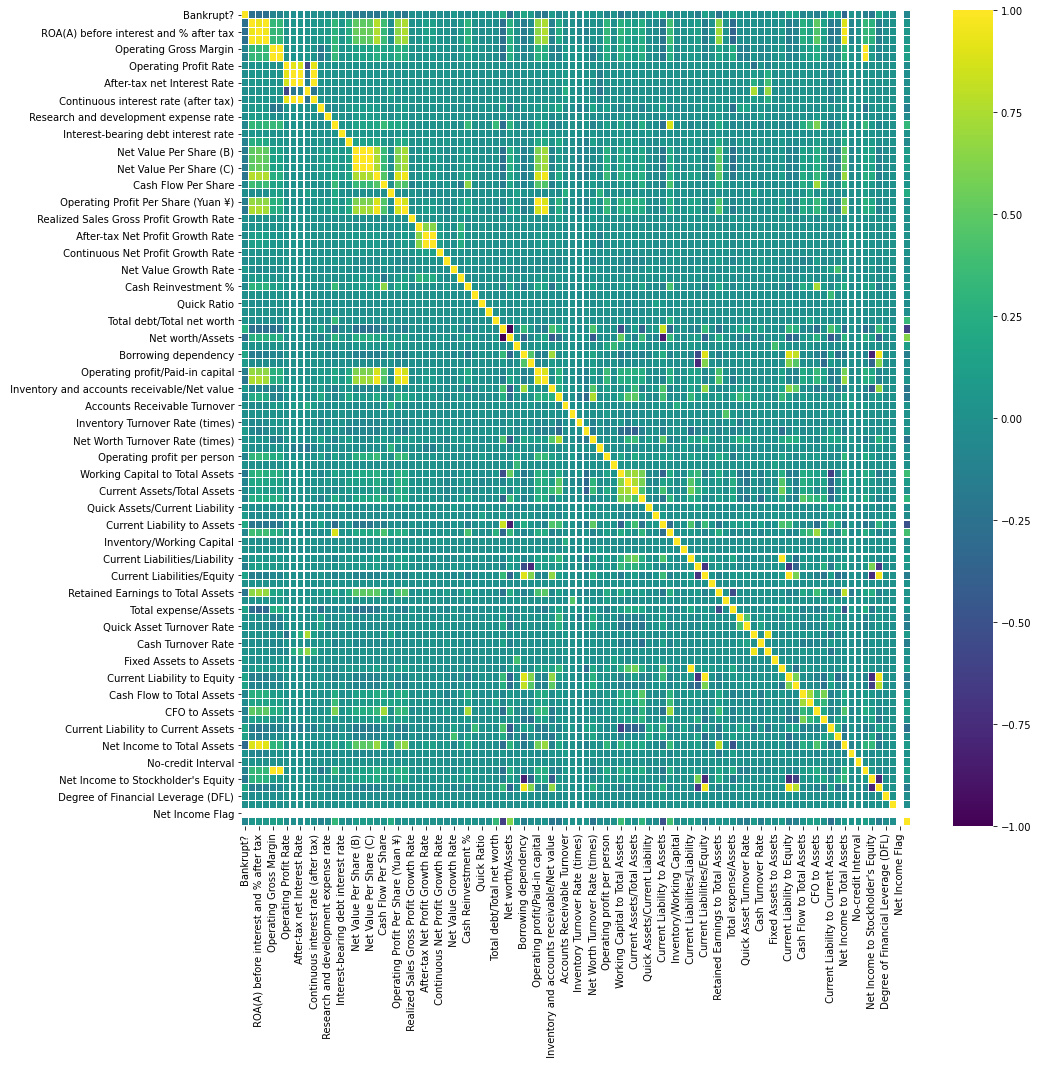

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
xdf = df.copy()

In [ ]:
df['Bankrupt?'].value_counts()
print('Financially stable:', round(df['Bankrupt?'].value_counts()[0] / len(df) * 100,2) ,'%')
print('Financially unstable:', round(df['Bankrupt?'].value_counts()[1] / len(df) * 100, 2), '%')

Financially stable: 96.77 %
Financially unstable: 3.23 %


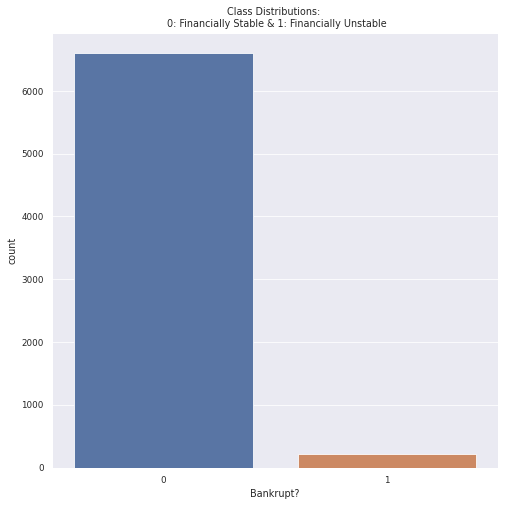

In [ ]:

sns.set_theme(context = 'paper')

plt.figure(figsize = (8,8))
sns.countplot(x = 'Bankrupt?', data = xdf);
plt.title('Class Distributions: \n 0: Financially Stable & 1: Financially Unstable');

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print("Financially Stable:", round(df['Bankrupt?'].value_counts()[0] / len(df) * 100, 2), '% of the dataset')
print("Financially Unstable:", round(df['Bankrupt?'].value_counts()[1] / len(df) * 100,2),'% of the dataset')

X = df.drop('Bankrupt?', axis = 1)
y = df['Bankrupt?']

sss = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False)

for train_index, test_index in sss.split(X,y):
    print("\n Train", train_index, "Test", test_index)
    org_Xtrain, org_Xtest = X.iloc[train_index], X.iloc[test_index]
    org_ytrain, org_ytest = y.iloc[train_index], y.iloc[test_index]
    

Financially Stable: 96.77 % of the dataset
Financially Unstable: 3.23 % of the dataset

 Train [1104 1118 1132 ... 6816 6817 6818] Test [   0    1    2 ... 1383 1384 1385]

 Train [   0    1    2 ... 6816 6817 6818] Test [1104 1118 1132 ... 2796 2797 2798]

 Train [   0    1    2 ... 6816 6817 6818] Test [1860 1861 1862 ... 4136 4137 4138]

 Train [   0    1    2 ... 6816 6817 6818] Test [2100 2147 2148 ... 5475 5476 5477]

 Train [   0    1    2 ... 5475 5476 5477] Test [3749 3908 4071 ... 6816 6817 6818]


In [ ]:
org_Xtrain = org_Xtrain.values
org_Xtest = org_Xtest.values
org_ytrain = org_ytrain.values
org_ytest = org_ytest.values

train_unique_label, train_counts_label = np.unique(org_ytrain, return_counts = True)
test_unique_label, test_counts_label = np.unique(org_ytest, return_counts = True)

print('Label Distirubtions: \n')
print(train_counts_label / len(org_ytrain))
print(test_counts_label / len(org_ytest))

Label Distirubtions: 

[0.96774194 0.03225806]
[0.96771827 0.03228173]


In [ ]:
df = df.sample(frac = 1)

sdf = df.loc[df['Bankrupt?'] == 0][:220]
ndf = df.loc[df['Bankrupt?']==1]

normal_distributed_df = pd.concat([sdf, ndf])

nxdf = normal_distributed_df.sample(frac = 1, random_state = 42)

In [ ]:
nxdf.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1756,1,0.434115,0.462549,0.480058,0.623013,0.623013,0.998633,0.796874,0.808806,0.303328,0.781034,8.084147e-04,3.025575e-04,0.486569,0.000541,0.000000,0.156968,0.156968,0.156968,0.194573,0.331188,0.008394,0.082404,0.154628,0.022034,0.848080,0.689474,0.689474,0.217602,3.700000e+09,0.000390,0.264257,0.411330,0.012484,0.009433,0.630274,0.006178,0.119267,0.880733,0.024233,...,0.410726,0.000564,0.011389,4.790000e+08,0.062118,0.378054,0.277069,0.003182,0.486479,0.735968,0.328928,0.014445,0.892959,0.002097,0.069171,2.513725e-04,2.423900e-04,0.594008,9.330000e+07,0.671565,0.011455,0.486479,0.328928,0.120352,0.636929,0.458001,0.709988,0.313628,0.023458,0,0.742137,0.000440,0.623860,0.623009,0.835861,0.279260,0.026689,0.564618,1,0.031375
1411,0,0.493687,0.557457,0.541838,0.599209,0.599209,0.998994,0.797388,0.809314,0.303470,0.781573,6.520000e+09,6.450000e+08,0.459584,0.000803,0.003239,0.167755,0.167755,0.167755,0.219438,0.294688,0.136062,0.116196,0.176998,0.022152,0.848081,0.703956,0.703956,0.219267,8.310000e+08,0.000688,0.264170,0.345032,0.006243,0.003990,0.633947,0.030507,0.228588,0.771412,0.005473,...,0.804776,0.066592,0.004710,1.490444e-03,0.237128,0.335263,0.279708,0.004314,0.996920,0.733768,0.353213,0.000000,0.931527,0.002250,0.032395,9.520000e+09,7.630000e+09,0.593918,2.350000e+09,0.671574,0.086995,0.996920,0.353213,0.110933,0.648600,0.459913,0.525152,0.316850,0.046111,0,0.799777,0.000950,0.623521,0.599210,0.840807,0.296904,0.030595,0.569102,1,0.014588
1446,1,0.491493,0.514828,0.531988,0.593768,0.593768,0.998888,0.797254,0.809188,0.303458,0.781422,8.370000e+09,1.410000e+09,0.464689,0.000567,0.000000,0.176942,0.176942,0.176942,0.205635,0.322133,0.013809,0.090546,0.163666,0.022799,0.848029,0.688851,0.688851,0.217560,7.140000e+09,0.000431,0.263910,0.382055,0.003101,0.002114,0.6

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Bankrupt?, dtype: float64


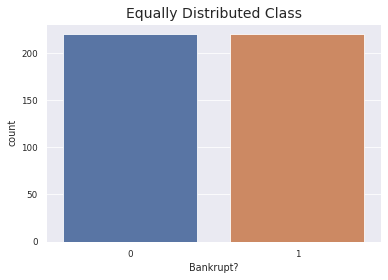

In [ ]:
print("Distribution of the Classes in the subsample dataset")
print(nxdf['Bankrupt?'].value_counts() / len(nxdf))

sns.countplot('Bankrupt?', data = nxdf)
plt.title("Equally Distributed Class", fontsize = 14)
plt.show()

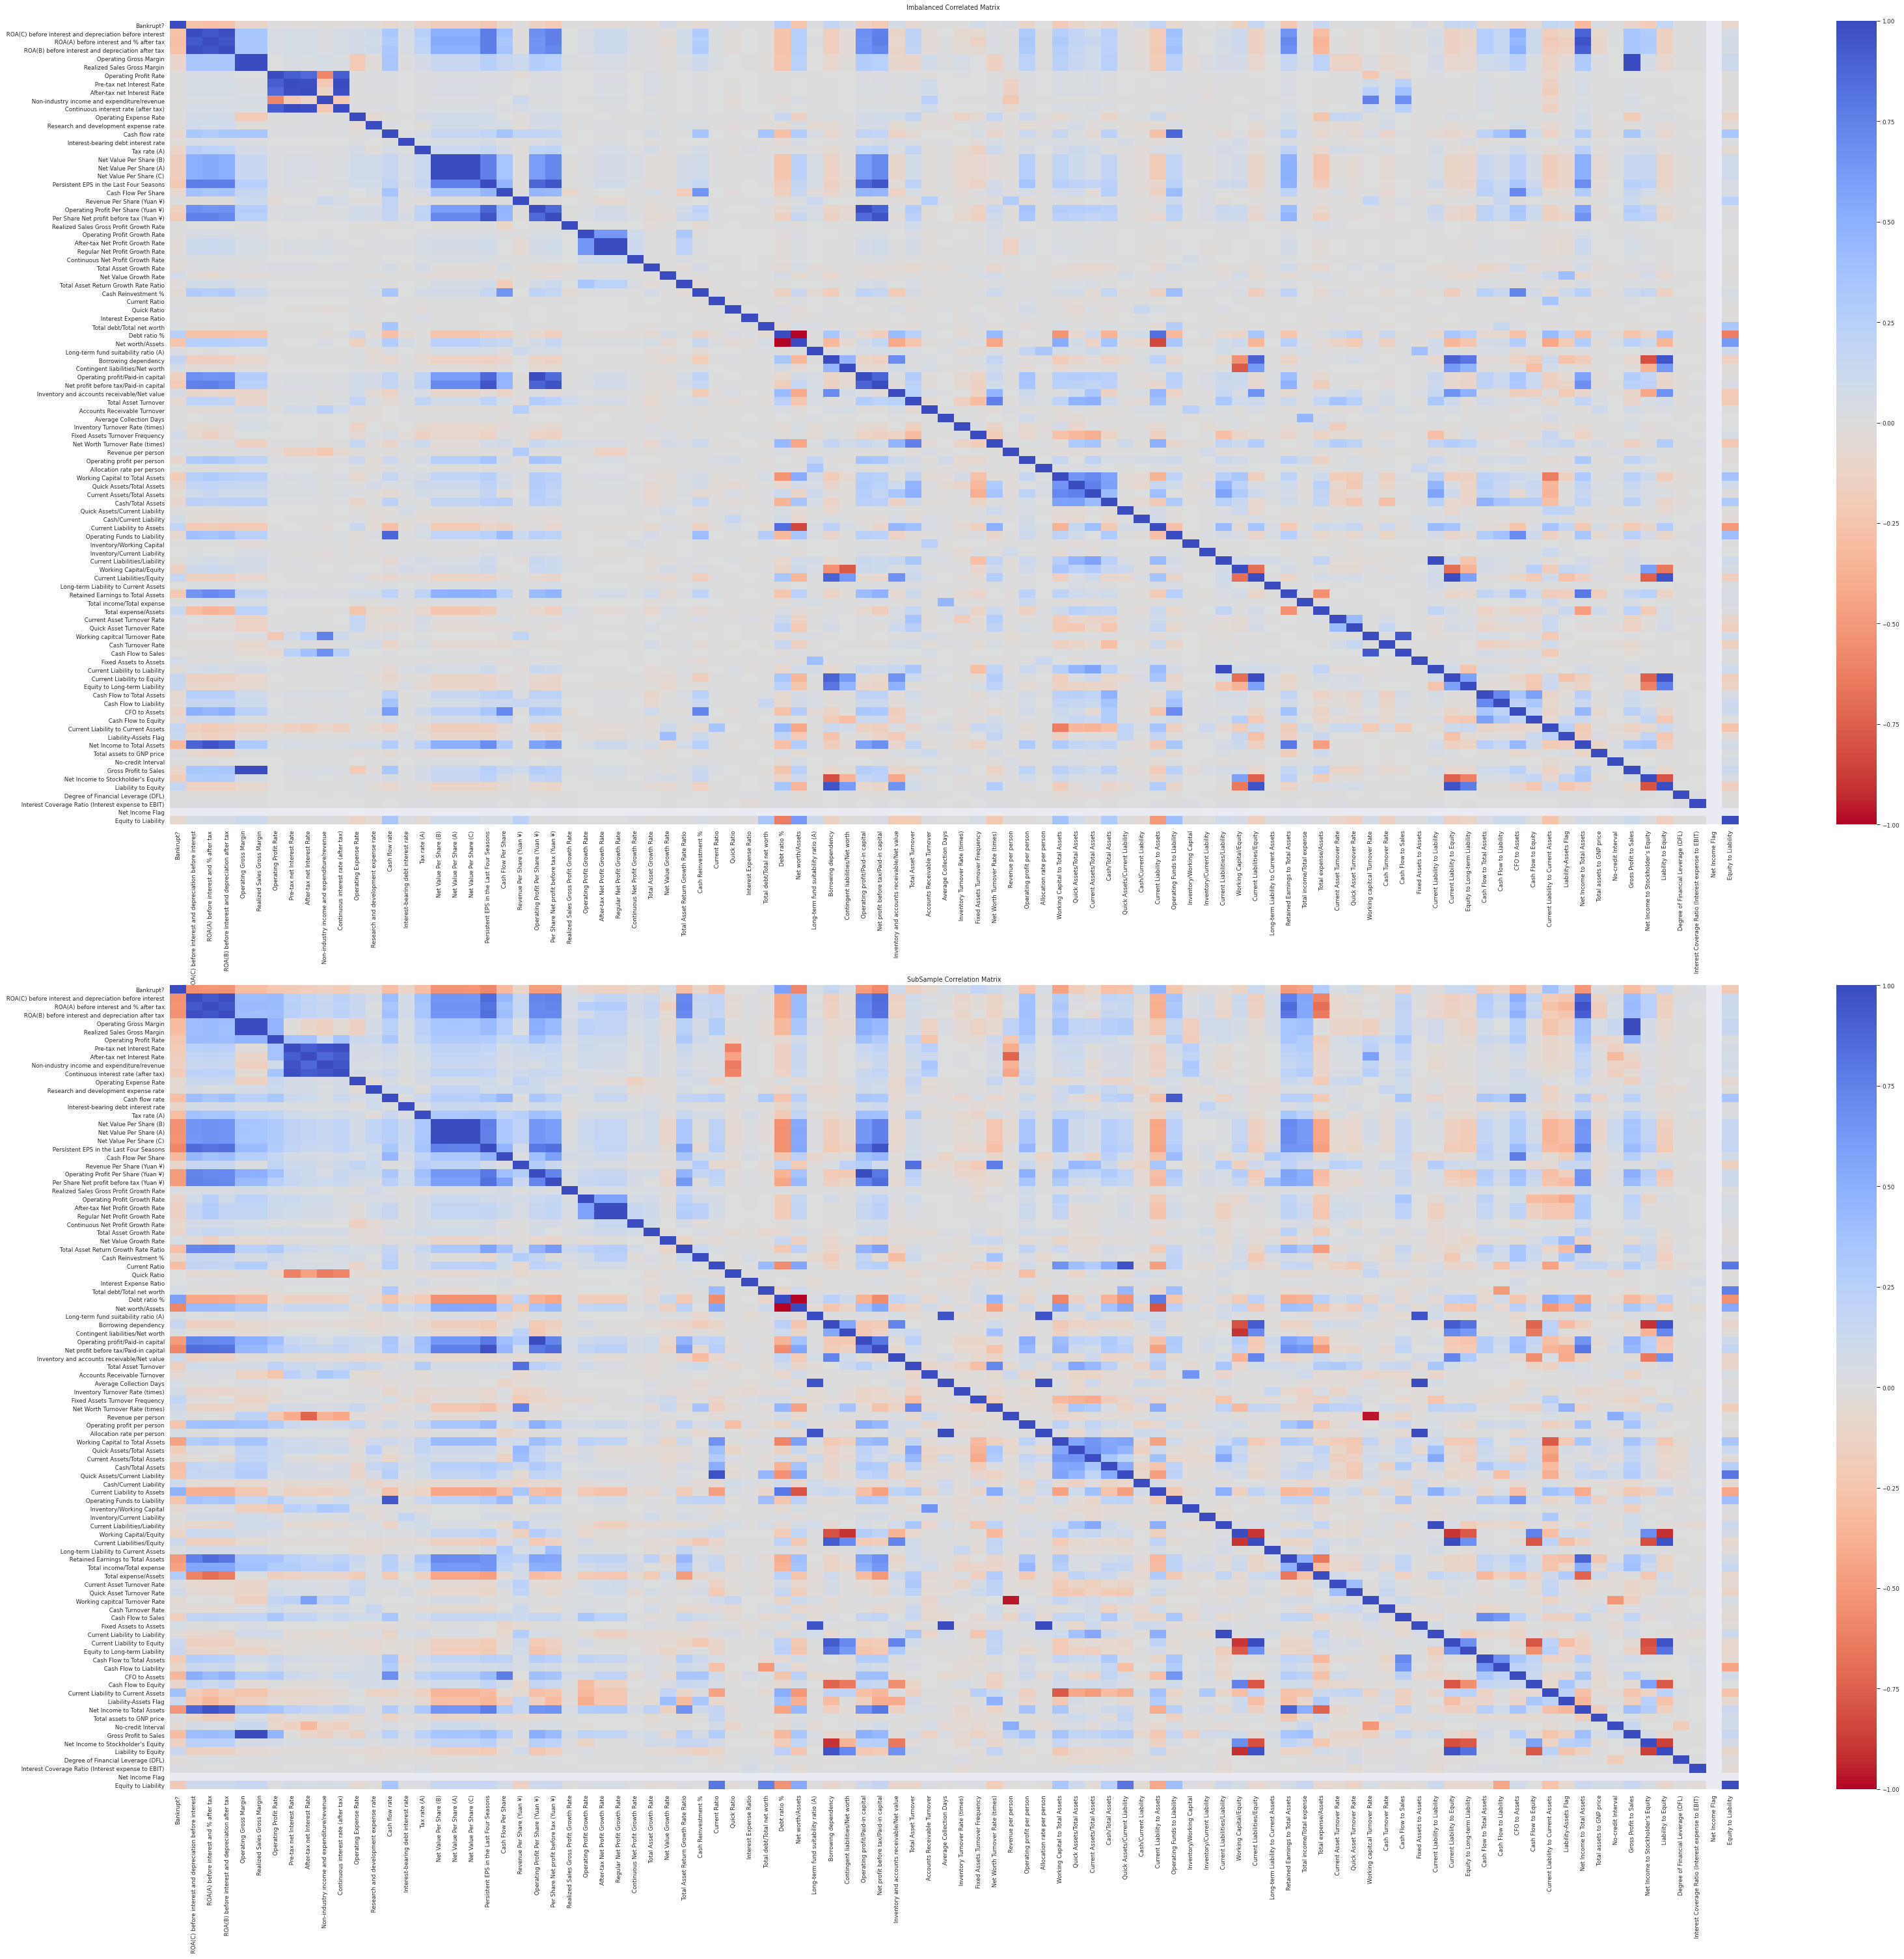

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1, figsize = (54,50))

corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm_r', annot_kws = {'size': 20}, ax= ax1)
ax1.set_title("Imbalanced Correlated Matrix \n")

sub_sample_corr = nxdf.corr()
sns.heatmap(sub_sample_corr, cmap = 'coolwarm_r', annot_kws = {'size': 20}, ax = ax2)
ax2.set_title("SubSample Correlation Matrix")
plt.show()

In [ ]:
## this is equally sampled dataset (perfectly balanced target)

X = nxdf.drop(['Bankrupt?'],1)
y = nxdf['Bankrupt?']

rf_fs_Xtrain, rf_fs_Xtest, rf_fs_ytrain, rf_fs_ytest = train_test_split(X,y, test_size = 0.1, random_state = 1)


Feature selection using the random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
## modelling with balanced traget 

model = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
model.fit(rf_fs_Xtrain, rf_fs_ytrain)

sel = SelectFromModel(model)

In [ ]:
## balanced target

sel.fit(rf_fs_Xtrain, rf_fs_ytrain)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=-1,
                                                 oob_score=False,


In [ ]:
selected_feat= rf_fs_Xtrain.columns[(sel.get_support())]
len(selected_feat)

25

In [ ]:
selected_feat

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Pre-tax net Interest Rate', ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate',
       ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Net Income to Total Assets', ' Net Income to Stockholder's Equity',
       ' Liability to Equity', ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability'],
    

In [ ]:
rf_fs = pd.DataFrame()

for column in selected_feat:
    if column in nxdf:
        rf_fs[column] = nxdf[column].values

print(rf_fs.shape)
rf_fs.head()

(440, 25)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Net Value Growth Rate,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Borrowing dependency,Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Total income/Total expense,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.434115,0.462549,0.480058,0.796874,0.808806,0.303328,0.781034,0.194573,0.154628,0.000390,0.009433,0.630274,0.006178,0.119267,0.880733,0.373629,0.153646,0.892959,0.002097,0.742137,0.835861,0.279260,0.026689,0.564618,0.031375
1,0.493687,0.557457,0.541838,0.797388,0.809314,0.303470,0.781573,0.219438,0.176998,0.000688,0.003990,0.633947,0.030507,0.228588,0.771412,0.396162,0.172913,0.931527,0.002250,0.799777,0.840807,0.296904,0.030595,0.569102,0.014588
2,0.491493,0.514828,0.531988,0.797254,0.809188,0.303458,0.781422,0.205635,0.163666,0.000431,0.002114,0.628259,0.006238,0.119932,0.880068,0.376331,0.162672,0.927388,0.002038,0.783153,0.839043,0.279303,0.026365,0.561751,0.031179
3,0.484961,0.546773,0.538787,0.797382,0.809307,0.303400,0.781564,0.214428,0.170445,0.000436,0.000586,0.635959,0.020118,0.204039,0.795961,0.390292,0.169376,0.931410,0.002230,0.795956,0.840042,0.289369,0.060652,0.570045,0.016822
4,0.383952,0.413596,0.428503,0.795313,0.807362,0.302934,0.779723,0.179257,0.138058,0.000343,0.005724,0.630253,0.015218,0.185265,0.814735,0.385143,0.137011,0.904383,0.001803,0.714420,0.829999,0.285816,0.026734,0.564873,0.018926


PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_components = 2
pca = PCA(n_components = n_components)
pca.fit(nxdf)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(rf_fs_Xtrain.values)
x_pca = pca.transform(nxdf)
x_pca.shape

(440, 2)

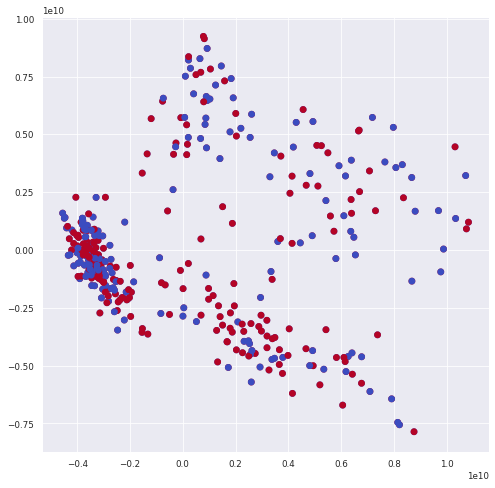

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(rf_fs_ytrain == 0), 
            cmap='coolwarm', label= 'Stable_Company', linewidths=2)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(rf_fs_ytrain == 1),
            cmap='coolwarm', label= 'Unstable_Company', linewidths=2)
plt.show()

In [ ]:
## Splitting dataset for Normal data without feature selection

X_train, X_test, y_train, y_test = train_test_split(nxdf.drop('Bankrupt?', axis = 1), nxdf['Bankrupt?'],test_size = 0.1, random_state = 1)

In [ ]:
## Splitting dataset for Data with feature selection

fs_Xtrain, fs_Xtest, fs_ytrain, fs_ytest = train_test_split(rf_fs, nxdf['Bankrupt?'], test_size = 0.1, random_state = 1)

In [ ]:
model_score = pd.DataFrame(columns = ("Original_Dataset","Selected_Dataset"))
model_score

,Original_Dataset,Selected_Dataset


EDA

Comparing different methods for refined and original datasets

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, confusion_matrix

### Logistic Regression without feature selection

In [ ]:
lrmodel1 = LogisticRegression(max_iter = 1000)
lrmodel1.fit(X_train, y_train)
score1 = lrmodel1.score(X_test, y_test)
lr_pred1 = lrmodel1.predict(X_test)

In [ ]:
print("Score with Logistic regression without feature selection:", score1)

Score with Logistic regression without feature selection: 0.6136363636363636


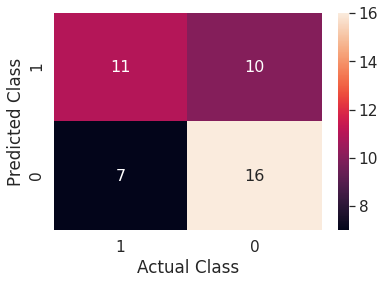

In [ ]:
lr_cm1 = confusion_matrix(y_test, lr_pred1, labels = (1,0))
lr_cm1
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(lr_cm1, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16})
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [ ]:
y_test.value_counts()

0    23
1    21
Name: Bankrupt?, dtype: int64

### Logistic Regression with feature selection

In [ ]:
lrmodel2 = LogisticRegression(max_iter = 1000)
lrmodel2.fit(fs_Xtrain, fs_ytrain)
score2 = lrmodel2.score(fs_Xtest, fs_ytest)
lr_ypred2 = lrmodel2.predict(fs_Xtest)


In [ ]:
print("Score with logistic regression using feature selection", score2)

Score with logistic regression using feature selection 0.4772727272727273


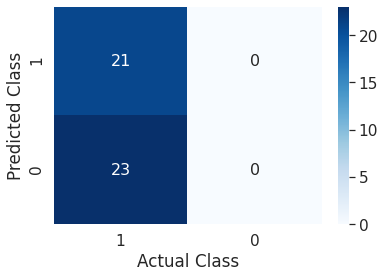

In [ ]:
lr_cm2 = confusion_matrix(fs_ytest, lr_ypred2, labels = (1,0))
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(lr_cm2, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16},cmap='Blues')
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [ ]:
model_score = model_score.append(pd.DataFrame({'Original_Dataset':[score1], 'Selected_Dataset': [score2]}, index = ['LogisticRegression']))
model_score

,Original_Dataset,Selected_Dataset
LogisticRegression,0.613636,0.477273


### Naive Bayes with original dataset

In [ ]:
naiveb1 = GaussianNB()
naiveb1.fit(X_train, y_train)
score1 = naiveb1.score(X_test, y_test)
nb_pred1 = naiveb1.predict(X_test)

In [ ]:
print("Score with Naive bayes using original dataset:", score1)

Score with Naive bayes using original dataset: 0.5227272727272727


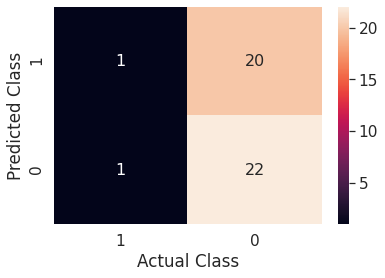

In [ ]:
nb_cm1 = confusion_matrix(y_test, nb_pred1, labels = (1,0))
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(nb_cm1, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16})
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

### Naive Bayes with feature selection dataset

In [ ]:
naiveb2 = GaussianNB()
naiveb2.fit(fs_Xtrain, fs_ytrain)
score2 = naiveb2.score(fs_Xtest, fs_ytest)
nb_pred2 = naiveb2.predict(fs_Xtest)
print("Score with naive bayes using feature selected dataset:", score2)

Score with naive bayes using feature selected dataset: 0.5227272727272727


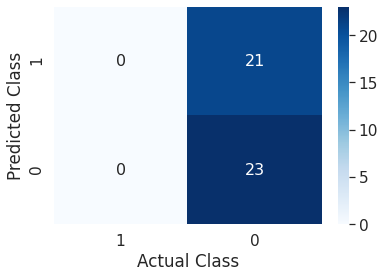

In [ ]:
nb_cm2 = confusion_matrix(fs_ytest, nb_pred2, labels = [1,0])
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(nb_cm2, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16},cmap= "Blues")
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [ ]:
model_score = model_score.append(pd.DataFrame({'Original_Dataset': [score1], 'Selected_Dataset': [score2]}, index = ['NaiveBayes']))
model_score

,Original_Dataset,Selected_Dataset
LogisticRegression,0.613636,0.477273
NaiveBayes,0.522727,0.522727


### KNN with original dataset

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors = 7)
knn1.fit(X_train, y_train)
score1 = knn1.score(X_test, y_test)
print("Score with KNN using original dataset",score1)

Score with KNN using original dataset 0.6590909090909091


In [ ]:
knn_pred1 = knn1.predict(X_test)
knn_cm1 = confusion_matrix(y_test, knn_pred1, labels = (1,0))

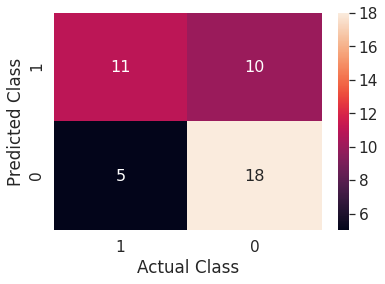

In [ ]:
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(knn_cm1, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16})
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

**Hyperparameter tuning for KNN**


In [ ]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    error_rate.append(np.mean(pred_knn != y_test))

Text(0, 0.5, 'Error Rate')

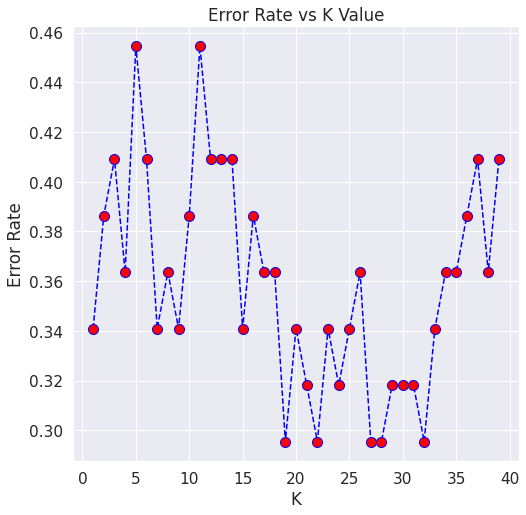

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(range(1,40), error_rate, color = 'blue', 
         linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10);
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
tuned_knn1 = KNeighborsClassifier(n_neighbors = 16)
tuned_knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [ ]:
tuned_score1 = tuned_knn1.score(X_test, y_test)
print("Score with tuned KNN using original dataset",tuned_score1)

Score with tuned KNN using original dataset 0.6136363636363636


### KNN with feature selection dataset

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 7)
knn2.fit(fs_Xtrain, fs_ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
score2 = knn2.score(fs_Xtest, fs_ytest)
print("Score with KNN using feature selected dataset",score2)

Score with KNN using feature selected dataset 0.9318181818181818


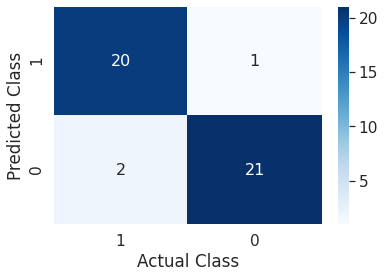

In [ ]:
knn_pred2 = knn2.predict(fs_Xtest)
knn_cm2 = confusion_matrix(fs_ytest, knn_pred2, labels = (1,0))
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(knn_cm2, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16},cmap="Blues")
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()


**Hyperparameter tuning for feature selection dataset**

In [ ]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(fs_Xtrain, fs_ytrain)
    pred_knn = knn.predict(fs_Xtest)
    error_rate.append(np.mean(pred_knn != fs_ytest))

Text(0, 0.5, 'Error Rate')

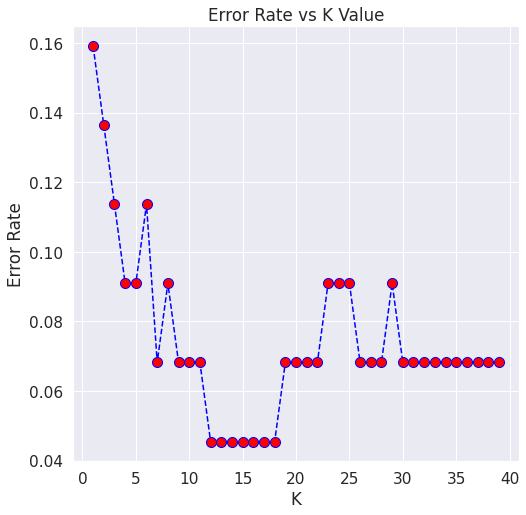

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(range(1,40), error_rate, color = 'blue',
         linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10);
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
tuned_knn2 = KNeighborsClassifier(n_neighbors = 14)
tuned_knn2.fit(fs_Xtrain, fs_ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [ ]:
tuned_score2 = tuned_knn2.score(fs_Xtest, fs_ytest)
print("score with tuned KNN using feature selected dataset",tuned_score2)

score with tuned KNN using feature selected dataset 0.9545454545454546


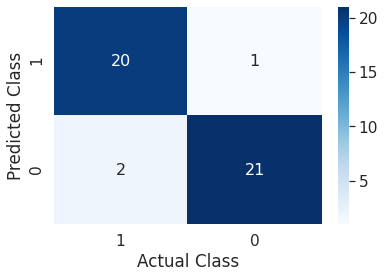

In [ ]:
tuned_knn_pred2 = knn.predict(fs_Xtest)
tuned_cm2 = confusion_matrix(fs_ytest, tuned_knn_pred2, labels = (1,0))
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(tuned_cm2, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16},cmap="Blues")
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [ ]:
model_score = model_score.append(pd.DataFrame({'Original_Dataset': [score1], 'Selected_Dataset': [score2]}, index = ['Untuned KNN']))
model_score = model_score.append(pd.DataFrame({'Original_Dataset': [tuned_score1], 'Selected_Dataset': [tuned_score2]}, index = ['Tuned KNN']))


In [ ]:
model_score

,Original_Dataset,Selected_Dataset
LogisticRegression,0.613636,0.477273
NaiveBayes,0.522727,0.522727
Untuned KNN,0.659091,0.931818
Tuned KNN,0.613636,0.954545


### Decision Tree with original dataset

In [ ]:
dt1 = DecisionTreeClassifier()
dt1 = dt1.fit(X_train, y_train)
score1 = dt1.score(X_test, y_test)
print("Score with decision tree using original dataset",score1)

Score with decision tree using original dataset 0.8636363636363636


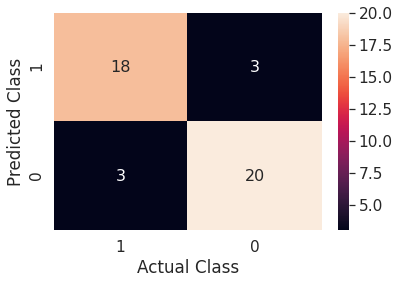

In [ ]:
dt_pred1 = dt1.predict(X_test)
dt_cm1 = confusion_matrix(y_test, dt_pred1, labels = [1,0])
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(dt_cm1, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16})
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

### Decision Tree with feature selection

In [ ]:
dt2 = DecisionTreeClassifier()
dt2 = dt2.fit(fs_Xtrain, fs_ytrain)
score2 = dt2.score(fs_Xtest, fs_ytest)
print("Score with decsion tree with feature selection",score2)

Score with decsion tree with feature selection 0.8181818181818182


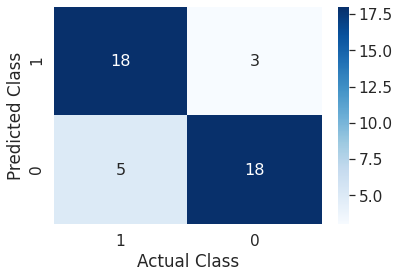

In [ ]:
dt_pred2 = dt2.predict(fs_Xtest)
dt_cm2 = confusion_matrix(fs_ytest, dt_pred2, labels = [1,0])
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(dt_cm2, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16},cmap="Blues")
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [ ]:
model_score = model_score.append(pd.DataFrame({'Original_Dataset': [score1], 'Selected_Dataset': [score2]}, index = ['DecisionTrees']))


In [ ]:
model_score


,Original_Dataset,Selected_Dataset
LogisticRegression,0.613636,0.477273
NaiveBayes,0.522727,0.522727
Untuned KNN,0.659091,0.931818
Tuned KNN,0.613636,0.954545
DecisionTrees,0.863636,0.818182


### Random Forest with original dataset

In [ ]:
rfclf1 = RandomForestClassifier(n_estimators = 100)
rfclf1.fit(X_train, y_train)
score1 = rfclf1.score(X_test, y_test)
print("Score with random forest using original dataset",score1)

Score with random forest using original dataset 0.9318181818181818


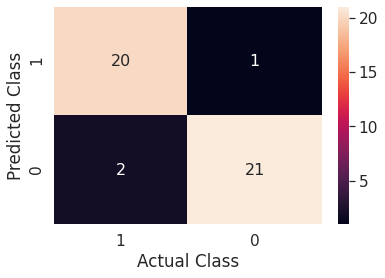

In [ ]:
rf_pred1 = rfclf1.predict(X_test)
rf_cm1 = confusion_matrix(y_test, rf_pred1, labels = (1,0))
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(rf_cm1, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16})
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

### Random Forest with feature selected dataset

In [ ]:
rfclf2 = RandomForestClassifier(n_estimators = 100)
rfclf2.fit(fs_Xtrain, fs_ytrain)
score2 = rfclf2.score(fs_Xtest, fs_ytest)
print("Score with random forest using feature selection dataset: ",score2)

Score with random forest using feature selection dataset:  0.9090909090909091


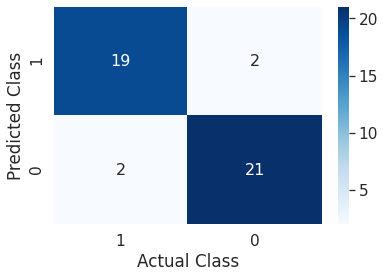

In [ ]:
rf_pred2 = rfclf2.predict(fs_Xtest)
rf_cm2 = confusion_matrix(fs_ytest, rf_pred2, labels = [1,0])
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(rf_cm2, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16},cmap="Blues")
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

**Hyper Parameter tuning**

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)
               ]
max_features = ['auto', 'sqrt']

max_depth = [2,4]

min_samples_split = [2, 5]

min_samples_leaf = [1, 2]

bootstrap = [True, False]

In [ ]:
# Create the parameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
tuned_rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = tuned_rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   13.8s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   29.8s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   49.8s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 64}

In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.929
Test Accuracy - : 0.909


In [ ]:
tuned_score2 = rf_Grid.score(X_test, y_test)
print("Score with tuned Random forest and feature selection",tuned_score2)

Score with tuned Random forest and feature selection 0.9090909090909091


In [ ]:
model_score = model_score.append(pd.DataFrame({'Original_Dataset': [score1], 'Selected_Dataset': [score2]}, index = ['RandomForest']))
model_score

,Original_Dataset,Selected_Dataset
LogisticRegression,0.613636,0.477273
NaiveBayes,0.522727,0.522727
Untuned KNN,0.659091,0.931818
Tuned KNN,0.613636,0.954545
DecisionTrees,0.863636,0.818182
RandomForest,0.931818,0.909091


### XGBoost with original dataset

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb1 = XGBClassifier(n_estimators = 100)
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
score1 = xgb1.score(X_test, y_test)
print("Score with XGBoost using original dataset",score1)

Score with XGBoost using original dataset 0.9090909090909091


In [ ]:
xgb_pred1 = xgb1.predict(X_test)
xgb_cm1 = confusion_matrix(y_test, xgb_pred1, labels = [1,0])

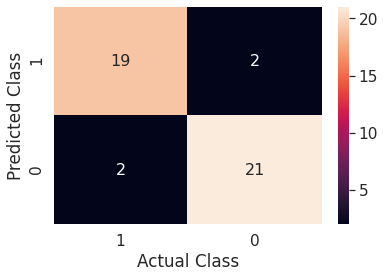

In [ ]:
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(xgb_cm1, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16})
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

### XGBoost with featured dataset

In [ ]:
xgb2 = XGBClassifier(n_estimators = 100)
xgb2.fit(fs_Xtrain, fs_ytrain)
score2 = xgb2.score(fs_Xtest, fs_ytest)
print("Score with XGboost using feature selecion dataset",score2)

Score with XGboost using feature selecion dataset 0.9545454545454546


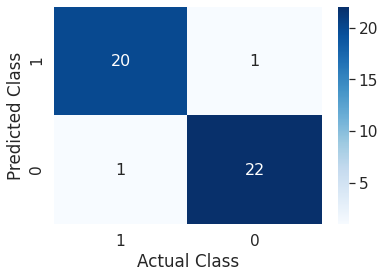

In [ ]:
xgb_pred2 = xgb2.predict(fs_Xtest)
xgb_cm2 = confusion_matrix(fs_ytest, xgb_pred2, labels = [1,0])
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(xgb_cm2, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16},cmap="Blues")
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

Hyper Parameter tuning for XgBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
tuned_xgb = XGBClassifier()
random_search = RandomizedSearchCV(tuned_xgb, param_distributions = params,
                                   n_iter = 5, scoring = 'roc_auc',
                                   n_jobs = 1, cv = 5, verbose = 3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7 
[CV]  min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, score=0.911, total=   0.1s
[CV] min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, score=0.912, total=   0.1s
[CV] min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7 
[CV]  min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, score=0.872, total=   0.1s
[CV] min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, score=0.998, total=   0.1s
[CV] min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7 
[CV]  min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, score=0.942, total=   0.1s
[CV] min_child_weight=3, max_depth=12, learning_rate=0.15, gamma=0.0, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=12, learning_rate=0.15, gamma=0.0, colsample_bytree=0.7, score=0.901, total=   0.2s
[CV] min_child_weight=3, max_depth=12, learning_rate=0.15, gamma=0.0, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=12, learning_rate=0.15, gamma=0.0, colsample_bytree=0.7, score=0.912, total=   0.2s
[CV] min_child_weight=3, max_depth=12, learning_rate=0.15, gamma=0.0, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=12, learning_rate=0.15, gamma=0.0, colsample_bytree=0.7, score=0.856, total=   0.2s
[CV] min_child_weight=3, max_depth=12,

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 5}

In [ ]:
tuned_score1 = random_search.score(X_test, y_test)
print("Score with tuned XGboost using original dataset",tuned_score1)

Score with tuned XGboost using original dataset 0.9668737060041408


In [ ]:
print (f'Train Accuracy - : {random_search.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {random_search.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.967


In [ ]:
tuned_xgb_pred1 = random_search.predict(X_test)
tuned_xgb_cm1 = confusion_matrix(y_test, tuned_xgb_pred1, labels = [1,0])

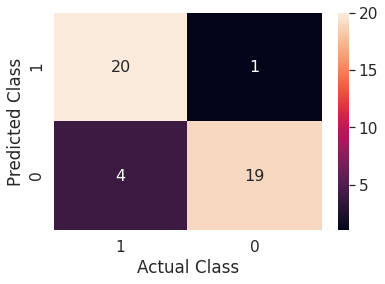

In [ ]:
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(tuned_xgb_cm1, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16})
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

**Hypertuning for balanced dataset**

In [ ]:
tuned_xgb2 = XGBClassifier()
random_search2 = RandomizedSearchCV(tuned_xgb2, param_distributions = params, n_iter = 5, 
                                    scoring = 'roc_auc', n_jobs = 1, cv = 5, verbose = 3)
random_search2.fit(fs_Xtrain, fs_ytrain)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.3 
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.3, score=0.891, total=   0.0s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.3 
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.3, score=0.927, total=   0.0s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.3 
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.3, score=0.865, total=   0.0s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.3 
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.3, score=0.991, total=   0.0s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.3 
[CV]  min

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.2, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.2, colsample_bytree=0.5, score=0.886, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.2, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.2, colsample_bytree=0.5, score=0.917, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.2, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.2, colsample_bytree=0.5, score=0.872, total=   0.0s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.2, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.2, colsample_bytree=0.5, score=0.988, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.2, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.2,

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.

In [ ]:
random_search2.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search2.best_params_


{'colsample_bytree': 0.3,
 'gamma': 0.3,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 3}

In [ ]:
tuned_score2 = random_search2.score(fs_Xtest, fs_ytest)
print("Score with tuned Xgboost using featured dataset:",tuned_score2)

Score with tuned Xgboost using featured dataset: 0.9710144927536232


In [ ]:
print (f'Train Accuracy - : {random_search2.score(fs_Xtrain,fs_ytrain):.3f}')
print (f'Test Accuracy - : {random_search2.score(fs_Xtest,fs_ytest):.3f}')

Train Accuracy - : 0.982
Test Accuracy - : 0.971


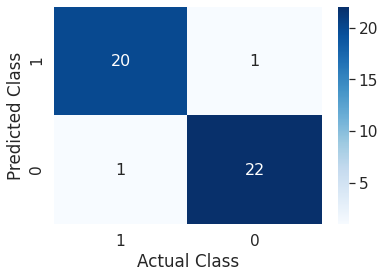

In [ ]:
tuned_xgb_pred2 = random_search2.predict(fs_Xtest)
tuned_xgb_cm2 = confusion_matrix(fs_ytest, tuned_xgb_pred2, labels = [1,0])
x_axis_labels = [1,0]
y_axis_labels = [1,0]

sns.set(font_scale=1.4)
sns.heatmap(tuned_xgb_cm2, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, annot_kws = {'size': 16},cmap="Blues")
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [ ]:
model_score = model_score.append(pd.DataFrame({'Original_Dataset': [tuned_score1], 'Selected_Dataset': [tuned_score2]}, index = ['XGBoost(Tuned)']))

In [ ]:
model_score

,Original_Dataset,Selected_Dataset
LogisticRegression,0.613636,0.477273
NaiveBayes,0.522727,0.522727
Untuned KNN,0.659091,0.931818
Tuned KNN,0.613636,0.954545
DecisionTrees,0.863636,0.818182
RandomForest,0.931818,0.909091
XGBoost(Tuned),0.966874,0.971014


In [ ]:
##Best Model

print(classification_report(fs_ytest, tuned_xgb_pred2))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.95      0.95      0.95        21

    accuracy                           0.95        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.95      0.95      0.95        44

